Part II
---


| Var | (a, sigma^2) | n | q | k | Rule | Law |
| --- | --- | --- | --- | --- | --- | --- |
| 5 | (0;9) | 60 | 1.75 | 3 | Стерджеса | Треугольное на отрезке (-2, 4) и модой, равной 1 |


how to move for random.triagualar -> stats.triang

c = (mode - left) / (right - left)

loc = left

scale = right - left

In [129]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import pandas as pd
import math
import statistics

# consts
n = 60
a = 0
sigma = 3
q = 1.75

left = -2
right = 4
mode = 1

my_c = (mode - left)/(right-left)
my_loc = left
my_scale = right-left

Task 1


In [130]:
sample = np.random.triangular(left, mode, right, size=n)
print(sample)

[ 2.88336099  0.96901343  0.6453506   1.71144993  1.41307473  2.49565734
 -0.2570713   0.96691616 -0.33627141  0.3844193   0.64321902  1.52927159
  0.71829715 -1.19780211  2.51142209  0.50273358  0.12807345 -0.66098458
 -1.16953319 -0.86995098  1.93727647  3.15220256  1.84391062  1.36676533
  2.03468922  1.04356336  2.09702899  0.53941603  3.14333389 -0.98180255
 -0.81351409  0.17562329  1.68980026 -0.86231838 -0.04886168  1.19186245
  1.43348     1.55506866 -0.78047184  0.65415545  3.08918532  2.10424278
  1.73887909  1.33602107  0.24041715 -0.75003872  2.18401484  0.31569691
  0.96930171  0.37464888 -0.19641054  0.6244565   0.78614165 -0.36587552
  0.71389815 -0.85082204  0.98737646  1.97217515 -0.14247996  1.07086299]


In [131]:
n_intervals = int(1 + 3.32*math.log10(n))+1
min_smpl = math.floor(sample.min())
max_smpl = math.ceil(sample.max())
h = (max_smpl-min_smpl)/n_intervals

print(f"Количество интервалов: {n_intervals}\nДлина интервала: {h}\nМаксимальный: {max_smpl}\nМинимальный элемент: {min_smpl} ")

Количество интервалов: 7
Длина интервала: 0.8571428571428571
Максимальный: 4
Минимальный элемент: -2 


In [132]:
intervals = []
for i in range(0, n_intervals):
    print(f'{i+1} interval: {min_smpl+i*h} - {min_smpl+(i+1)*h}')
    intervals.append(min_smpl+i*h)
intervals.append(min_smpl+n_intervals*h)

1 interval: -2.0 - -1.1428571428571428
2 interval: -1.1428571428571428 - -0.2857142857142858
3 interval: -0.2857142857142858 - 0.5714285714285712
4 interval: 0.5714285714285712 - 1.4285714285714284
5 interval: 1.4285714285714284 - 2.2857142857142856
6 interval: 2.2857142857142856 - 3.1428571428571423
7 interval: 3.1428571428571423 - 4.0


In [133]:
frequency = []
arraySort = list(sample)
arraySort.sort()
for i in range(0, len(intervals)-1):
    frequency.append(0)
    for j in arraySort:
        if j >= intervals[i] and j <= intervals[i+1]:
            frequency[i] += 1
for i in range(0, len(frequency)):
    print(f'{i+1} interval: {frequency[i]}')
frequency = np.array(frequency)

print(f'\nСумма частот - {(frequency/n).sum()}')

1 interval: 2
2 interval: 10
3 interval: 12
4 interval: 17
5 interval: 13
6 interval: 4
7 interval: 2

Сумма частот - 1.0


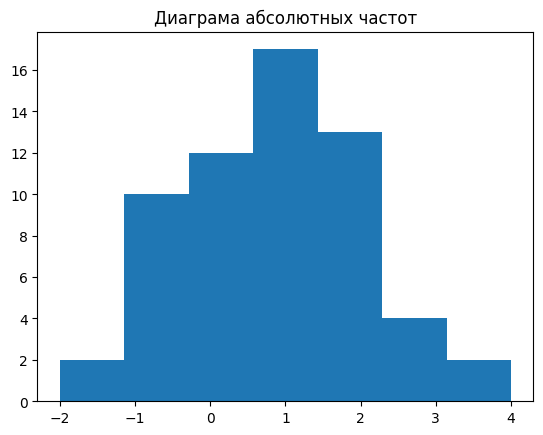

In [134]:
plt.title("Диаграма абсолютных частот")
plt.stairs(frequency, intervals, fill=True)

In [135]:
my_pdf = frequency/(h*n)
for i in range(0, len(my_pdf)):
    print(f'{i+1} interval: {my_pdf[i]}')
# print(f'Сумма абсолютных частот {tmp.sum()}')

1 interval: 0.03888888888888889
2 interval: 0.19444444444444448
3 interval: 0.23333333333333336
4 interval: 0.3305555555555556
5 interval: 0.2527777777777778
6 interval: 0.07777777777777778
7 interval: 0.03888888888888889


[0.03888889 0.19444444 0.23333333 0.33055556 0.25277778 0.07777778
 0.03888889]
1.1666666666666667


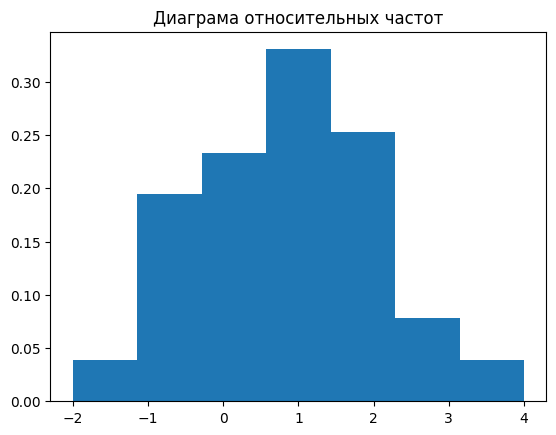

In [136]:
plt.title("Диаграма относительных частот")
plt.stairs(my_pdf, intervals, fill=True)
print(my_pdf)
print(my_pdf.sum())

Task 2

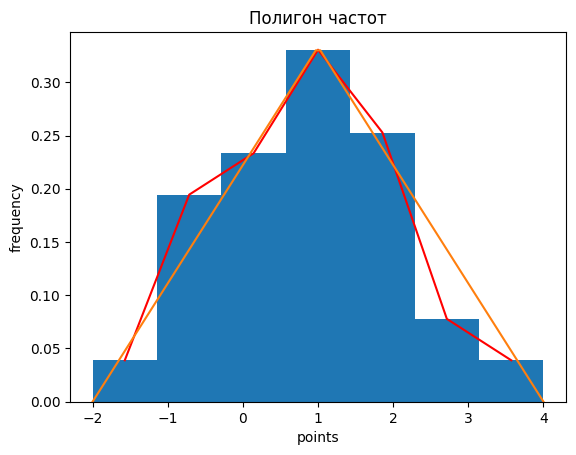

In [137]:
lineY = []
for i in my_pdf:
    lineY.append(i)
lineX = []
for i in range(0, len(intervals)-1):
    lineX.append(intervals[i]+h/2)
plt.stairs(my_pdf, intervals, fill=True)
plt.plot(lineX, lineY, color="red")

x = np.linspace(left, right, 100)
plt.plot(x, sts.triang.pdf(x, c=my_c, loc=my_loc, scale=my_scale))

plt.title('Полигон частот')
plt.xlabel('points')
plt.ylabel('frequency')
plt.show()

In [138]:
# check
proof = 0 
for i in frequency/n/h:
    proof+=i*h
print("Сумма площадей под графиком: ", proof)

Сумма площадей под графиком:  1.0


Function graph

In [139]:
arrayGraph = []
tmp1= frequency/n
for i in range(0, len(tmp1)):
    arrayGraph.append(0)
    for j in range (0, i):
        arrayGraph[i]+=tmp1[j]
cdfY = []
for i in arrayGraph:
    cdfY.append(i)
cdfY.append(1)
cdfX = []
for i in intervals:
    cdfX.append(i)


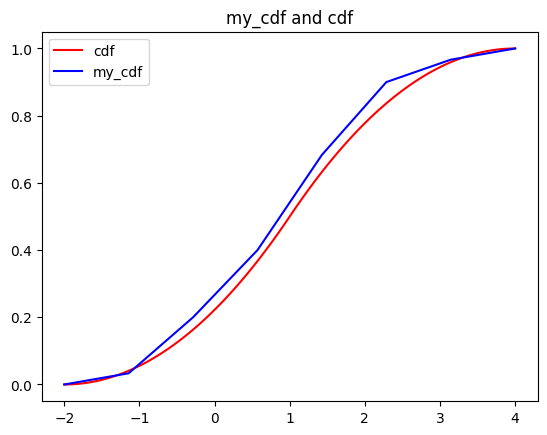

In [140]:
# fig, ax = plt.subplots()
# for i in range(0, len(arrayGraph)):
#     ax.hlines(y=arrayGraph[i], xmin=intervals[i], xmax=intervals[i+1], linewidth=2, color='r')
    
# ax.hlines(y=1, xmin=intervals[len(intervals)-1], xmax=intervals[len(intervals)-1]+10, linewidth=2, color='r')
# ax.hlines(y=0, xmin=intervals[0]-10, xmax=intervals[0], linewidth=2, color='r')
# plt.plot(x, sts.norm.cdf(x, a, sigma))
# ---------------------------------------------------

x = np.linspace(left, right, 100)
plt.plot(x, sts.triang.cdf(x, c=my_c, loc=my_loc, scale=my_scale), color="red")

plt.plot(cdfX, cdfY, color="blue")
plt.legend(['cdf', 'my_cdf'])
plt.title("my_cdf and cdf")
plt.show()

,X
0.25,-0.072266
0.50,0.752219
0.75,1.695213


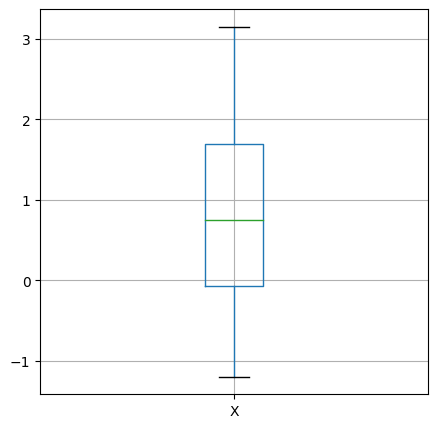

In [141]:
df = pd.DataFrame(data=sample,columns=['X'])
df.boxplot(figsize = (5, 5))
df.quantile([0.25,0.5,0.75])

part 3


In [142]:
print(q)
print(f"Вероятность по таблице {0.04599*2}")
print(f"Вероятность по lib {sts.laplace(scale=sigma).pdf(q)}")
prob = 0
for i in sample:
    if i>-q and i<q:
        prob+=1
prob/=n
print(f"Статистическая {prob}")


1.75
Вероятность по таблице 0.09198
Вероятность по lib 0.09300585762834118
Статистическая 0.7833333333333333


In [143]:
tem1 = frequency/n
sample 

my_mean = statistics.mean(sample)
my_variacne = statistics.variance(sample)
my_dev = math.sqrt(my_variacne)
my_skewness = sts.skew(sample)
my_kurtosis = sts.kurtosis(sample)
print(f'mean - {my_mean}, \nvariacne - {my_variacne}, \ndev - {my_dev}, \nSkewness - {my_skewness}, \nKurtosis - {my_kurtosis}')


mean - 0.8263924286477399, 
variacne - 1.3506740129811365, 
dev - 1.162185016673824, 
Skewness - 0.1085318363517658, 
Kurtosis - -0.7598118560368237


In [144]:
X = sample.sum()/len(sample)
print(f'Первый эмпирический момент: {X}')
s2 = 0
for i in sample:
    s2 += (i-X)**2
s2 = s2/len(sample)
print(f'Эмпирическая дисперсия: {s2}')
print(f'Стандартное отклонение: {math.sqrt(s2)}')

x4 = 0
s3 = 0
s4 = 0
for i in sample:
    x4 += math.pow(i, 4)
    s3 += math.pow((i-X), 3)
    s4 += math.pow((i-X), 4)
x4 /= len(sample)
s3 /= len(sample)
s4 /= len(sample)
print(f'Коэффициент ассимметрии: {s3/math.pow(math.sqrt(s2), 3)}')
print(f'Коэффициент эксцесса: {s4/math.pow(s2, 2)-3}')

Первый эмпирический момент: 0.8263924286477398
Эмпирическая дисперсия: 1.3281627794314512
Стандартное отклонение: 1.1524594480637709
Коэффициент ассимметрии: 0.10853183635176568
Коэффициент эксцесса: -0.7598118560368219


Part II
---
